In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

/home/piai/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/piai/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
matplotlib.rc('font', family='NanumGothic')

In [3]:
df_raw = pd.read_csv('./Data/3. Big Data 분석/HMEQ.csv')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [7]:
df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=1234)
print(f'train data size: {df_train.shape}')
print(f'test data size: {df_test.shape}')

train data size: (2623, 13)
test data size: (1125, 13)


In [8]:
log_model = Logit.from_formula('BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + NINQ + CLNO + DEBTINC', df_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.241486
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2607
Method:                           MLE   Df Model:                           15
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.2131
Time:                        10:49:59   Log-Likelihood:                -633.42
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 6.168e-64
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.7308      0.550    -10.422      0.000      -6.809      -4.653

In [9]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

1721    0
822     0
1686    0
789     0
165     0
dtype: int64

In [10]:
print('Accuracy: {0:.3f}\n'.format(accuracy_score(df_test['BAD'], y_pred_class)))
print('Confusion Matrix: \n{}'.format(confusion_matrix(df_test['BAD'], y_pred_class)))

Accuracy: 0.924

Confusion Matrix: 
[[1018    3]
 [  82   22]]


/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


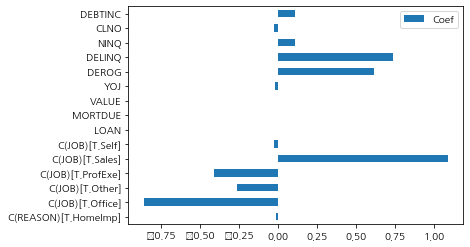

In [11]:
df_logistic_coef = pd.DataFrame({'Coef': log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef')

In [12]:
df_char = df_raw.select_dtypes(include='object')
df_numeric = df_raw.select_dtypes(exclude='object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis=1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [13]:
df_scaled['BAD'] = np.where(df_scaled['BAD'] > 0, 1, 0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [14]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size=0.3, random_state=1234)

In [15]:
scaled_log_model = Logit.from_formula('BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + NINQ + CLNO + DEBTINC', df_scaled_train)
scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.241486
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2607
Method:                           MLE   Df Model:                           15
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.2131
Time:                        11:13:08   Log-Likelihood:                -633.42
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 6.168e-64
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.4514      0.204    -11.999      0.000      -2.852      -2.051

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


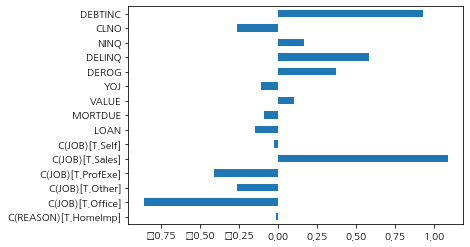

In [16]:
df_log_scaled_coef = pd.DataFrame({"Coef":scaled_log_result.params.values[1:]}, index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y='Coef', legend=False)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [33]:
df = pd.read_csv('./Data/3. Big Data 분석/HMEQ.csv')

In [34]:
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [35]:
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [36]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [37]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy.drop('BAD',axis=1), df_raw_dummy['BAD'], test_size=0.3)

In [38]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Accuarcy on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuarcy on test set: 0.932


In [40]:
train_accuracy = []
test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [41]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.928,0.921
1,2,0.932,0.930
2,3,0.934,0.930
3,4,0.936,0.931
4,5,0.939,0.926
5,6,0.944,0.930
6,7,0.949,0.931
7,8,0.950,0.927
8,9,0.956,0.931
9,10,0.963,0.931


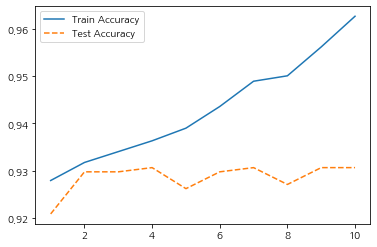

In [42]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

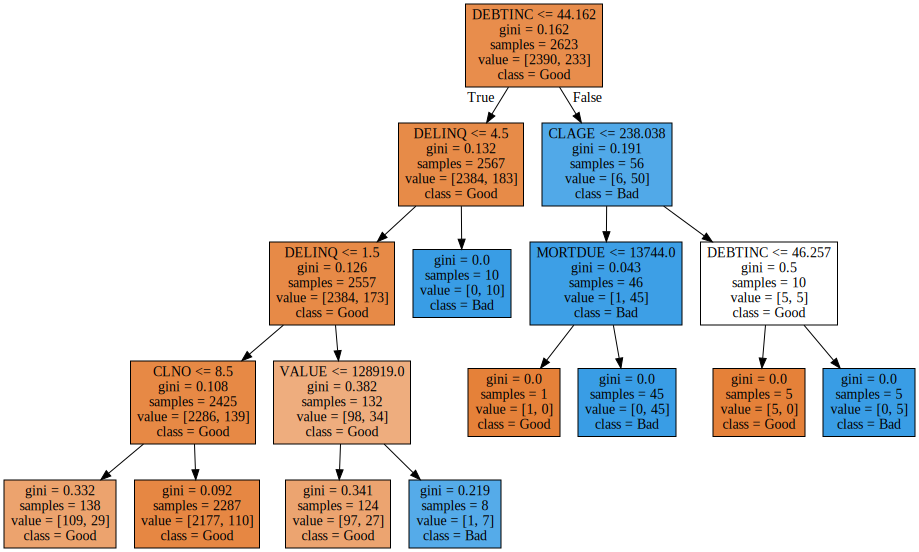

In [49]:
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth=4, random_state=1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'], feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

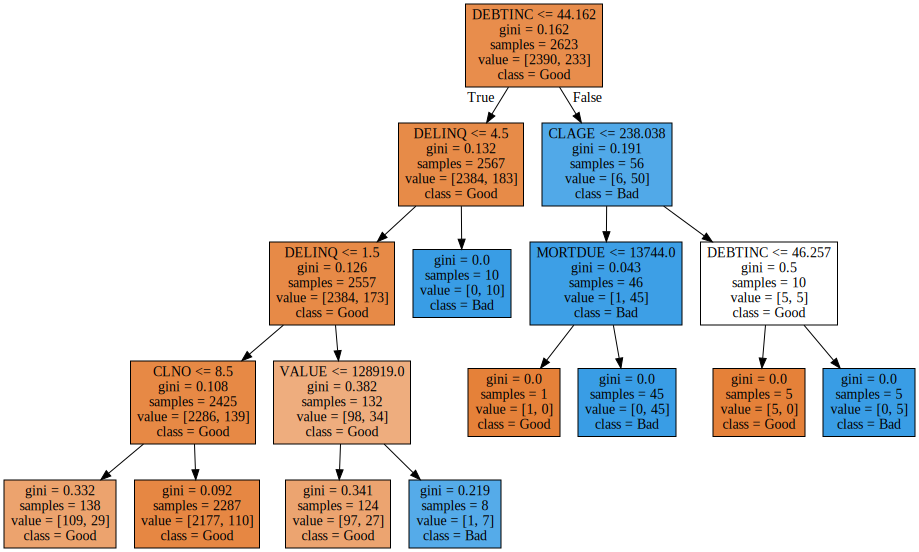

In [48]:
v_feature_name = df_train_x.columns
tree_high = DecisionTreeClassifier(max_depth=6, random_state=1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file='tree_high.dot', class_names=['Good', 'Bad'], feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_high.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [51]:
train_accuracy = []
test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(max_depth=4, min_samples_split=v_min_samples_split, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [53]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.928,0.921
1,2,0.932,0.930
2,3,0.934,0.930
3,4,0.936,0.931
4,5,0.939,0.926
5,6,0.944,0.930
6,7,0.949,0.931
7,8,0.950,0.927
8,9,0.956,0.931
9,10,0.963,0.931


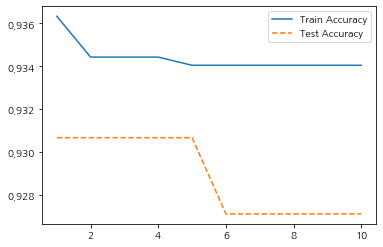

In [52]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

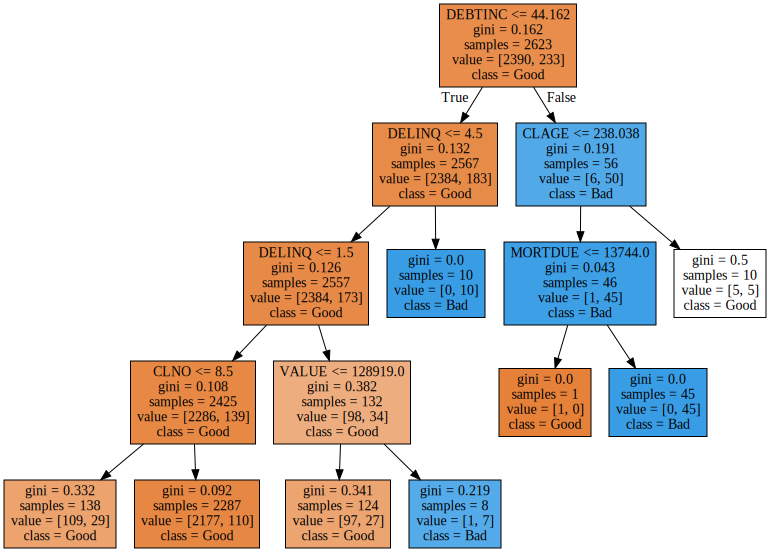

In [54]:
tree_low = DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'], feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


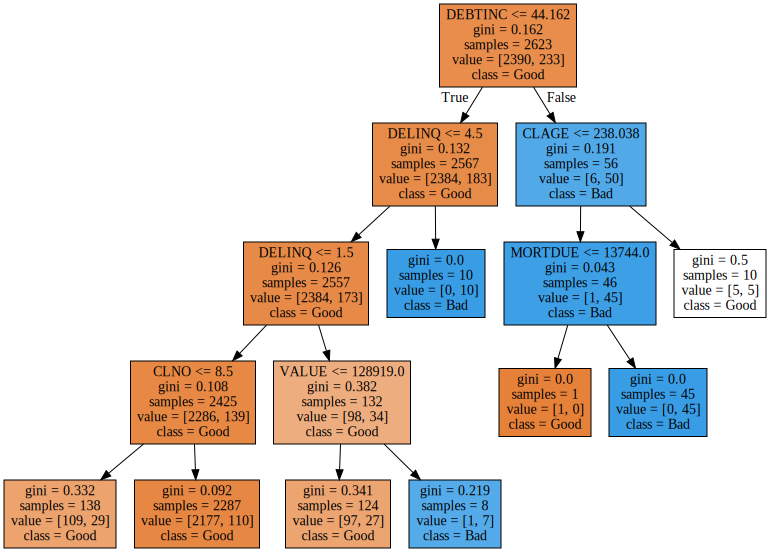

In [55]:
tree_high = DecisionTreeClassifier(max_depth=6, min_impurity_split=30, random_state=1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file='tree_high.dot', class_names=['Good', 'Bad'], feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_high.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [57]:
train_accuracy = []
test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=v_min_samples_leaf, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [58]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.928,0.921
1,2,0.932,0.930
2,3,0.934,0.930
3,4,0.936,0.931
4,5,0.939,0.926
5,6,0.944,0.930
6,7,0.949,0.931
7,8,0.950,0.927
8,9,0.956,0.931
9,10,0.963,0.931


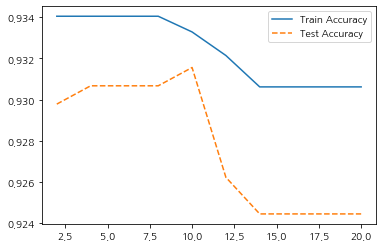

In [59]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

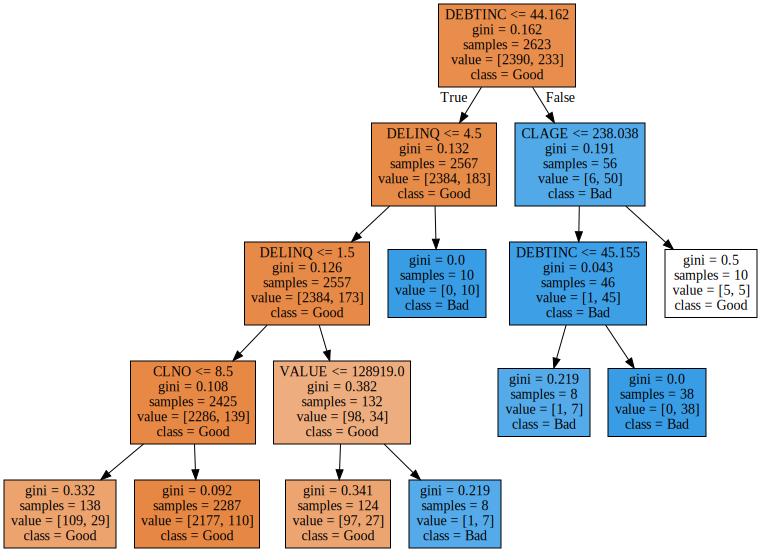

In [60]:
tree_low = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=8, random_state=1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'], feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)


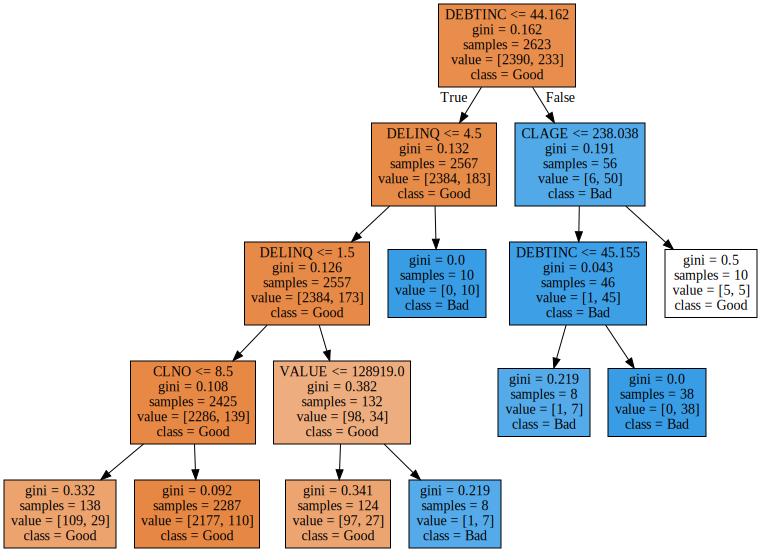

In [61]:
tree_high = DecisionTreeClassifier(max_depth=6, min_impurity_split=30, min_samples_leaf=10, random_state=1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file='tree_high.dot', class_names=['Good', 'Bad'], feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_high.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [62]:
tree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=8, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

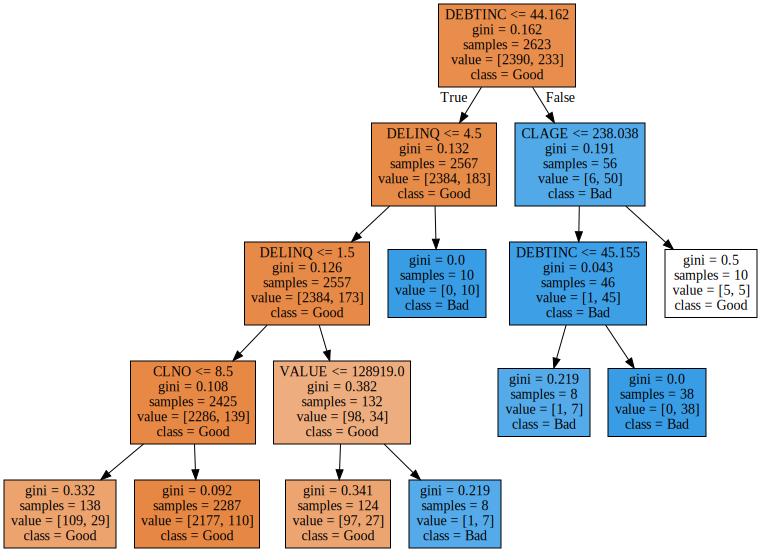

In [63]:
export_graphviz(tree_final, out_file='tree_final.dot', class_names=['Good', 'Bad'], feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [64]:
y_pred = tree_final.predict(df_test_x)
print('Accuracy: {0:.3f}\n'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix: \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.931

Confusion matrix: 
[[1010    3]
 [  75   37]]


In [65]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.625
5,DELINQ,0.231
8,CLNO,0.058
2,VALUE,0.055
6,CLAGE,0.032
11,REASON_HomeImp,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000
14,JOB_Other,0.000
13,JOB_Office,0.000


Text(0, 0.5, '설명변수')

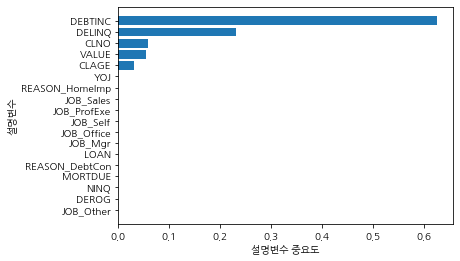

In [66]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [67]:
estimator = DecisionTreeClassifier()
param_grid = {'max_depth': para_depth, 'min_samples_split':para_split, 'min_samples_leaf':para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print('best estimator model: \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_dt.best_params_))
print('\nbest score: \n{}'.format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

best parameter: 
{'max_depth': 8, 'min_samples_leaf': 6, 'min_samples_split': 10}

best score: 
0.935


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [83]:
df_raw=pd.read_csv("./Data/3. Big Data 분석/HMEQ.csv",engine="python",encoding="euc-kr")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [84]:
df_raw.isnull().sum(axis=0)
 
df_raw["JOB"].fillna("Other",inplace=True)

df_raw.fillna(df_raw.mean(),inplace=True)
 
df_raw_dummy=pd.get_dummies(df_raw)

df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [85]:
df_raw_y=df_raw_dummy["BAD"]
df_raw_x=df_raw_dummy.drop("BAD",axis=1,inplace=False)

In [86]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

In [87]:
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2623, 18)
train data Y size:(2623,)
test data X size:(1125, 18)
test data Y size:(1125,)


In [88]:
rf_uncustomized=RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Score on test set: 0.946


In [89]:
train_accuracy=[]
test_accuracy=[]

para_n_tree=[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n["n_estimators"]=para_n_tree
df_accuracy_n["TrainAccuracy"]=train_accuracy
df_accuracy_n["TestAccuracy"]=test_accuracy

df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.992,0.944
1,20,0.999,0.943
2,30,0.999,0.942
3,40,1.000,0.946
4,50,1.000,0.944
5,60,1.000,0.948
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.946
9,100,1.000,0.946


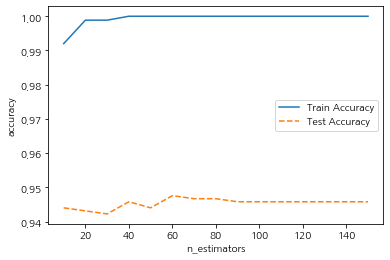

In [90]:
plt.plot(para_n_tree,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle="--",label="Test Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do no

Text(0.5, 0, 'n_estimators')

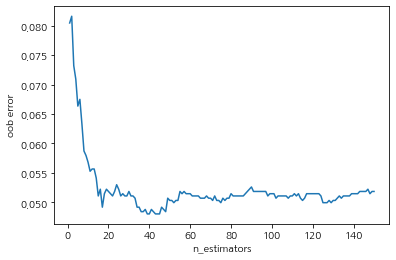

In [91]:
oob_error=[]

for v_n_estimator in range(1,151):
    rf=RandomForestClassifier(n_estimators =v_n_estimator,oob_score=True,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    oob_error.append(1-rf.oob_score_)

plt.plot(range(1,151),oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [92]:
train_accuracy=[]
test_accuracy=[]

 

para_depth=[depth for depth in range(1,11)]

 

for v_max_depth in para_depth:
    rf=RandomForestClassifier(random_state=1234,n_estimators=100,
                            max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainAccuracy"]=train_accuracy
df_accuracy_depth["TestAccuracy"]=test_accuracy

 

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.908,0.908
1,2,0.912,0.910
2,3,0.932,0.928
3,4,0.933,0.930
4,5,0.938,0.931
5,6,0.941,0.932
6,7,0.945,0.934
7,8,0.949,0.936
8,9,0.951,0.935
9,10,0.956,0.938


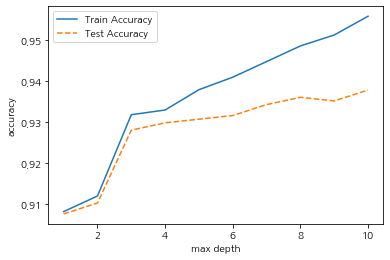

In [93]:
plt.plot(para_depth,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle="--",label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("max depth")
plt.legend()

In [94]:
train_accuracy=[]
test_accuracy=[]

para_split=[n_split*10  for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(random_state=1234,n_estimators=100,
                             max_depth=4,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_split=pd.DataFrame()
df_accuracy_split["MinSamplesSplit"]=para_split
df_accuracy_split["TrainAccuracy"]=train_accuracy
df_accuracy_split["TestAccuracy"]=test_accuracy

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.933,0.929
1,20,0.933,0.929
2,30,0.932,0.929
3,40,0.933,0.929
4,50,0.932,0.929
5,60,0.932,0.929
6,70,0.932,0.929
7,80,0.932,0.928
8,90,0.932,0.928
9,100,0.932,0.928


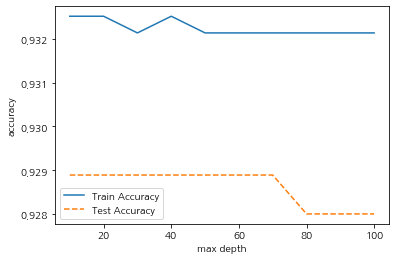

In [95]:
plt.plot(para_split,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle="--",label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("max depth")
plt.legend()

In [96]:
train_accuracy=[]
test_accuracy=[]

para_leaf=[n_leaf*10  for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(random_state=1234,n_estimators=100, min_samples_leaf=v_min_samples_leaf, max_depth=4)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["TrainAccuracy"]=train_accuracy
df_accuracy_leaf["TestAccuracy"]=test_accuracy

df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.930,0.928
1,20,0.927,0.925
2,30,0.927,0.924
3,40,0.920,0.916
4,50,0.908,0.908
5,60,0.908,0.908
6,70,0.908,0.908
7,80,0.908,0.908
8,90,0.908,0.908
9,100,0.908,0.908


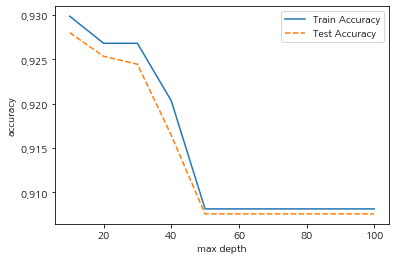

In [97]:
plt.plot(para_split,train_accuracy,linestyle="-",label="Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle="--",label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("max depth")
plt.legend()

In [98]:
min_sample_leaf=20

rf_final=RandomForestClassifier(random_state=1234,n_estimators=100,min_samples_leaf=20,
                              max_depth=4)
rf_final.fit(df_train_x,df_train_y)

y_pred=rf_final.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Accuracy test set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set: 0.927
Accuracy test set: 0.925
Confusion matrix:
[[1021    0]
 [  84   20]]


In [99]:
v_feature_name=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.475
5,DELINQ,0.175
4,DEROG,0.066
6,CLAGE,0.061
7,NINQ,0.058
8,CLNO,0.051
0,LOAN,0.039
2,VALUE,0.027
3,YOJ,0.014
1,MORTDUE,0.013


Text(0, 0.5, '변수')

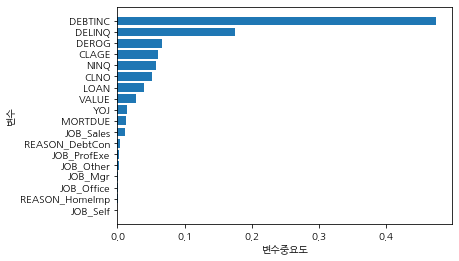

In [100]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수중요도")
plt.ylabel("변수")

In [101]:
estimator = RandomForestClassifier(n_estimators=100,random_state=1234)

param_grid = {'max_depth':para_depth,
             'min_samples_leaf':para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

print(f'best estimator model: \n{grid_rf.best_estimator_}')
print(f'\nbest parameter: \n{grid_rf.best_params_}')
print(f'nbest score: \n{grid_rf.best_score_.round(3)}')

best estimator model: 
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

best parameter: 
{'max_depth': 6, 'min_samples_leaf': 10}
nbest score: 
0.931
